In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from tensorflow.keras.datasets import mnist

In [19]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
single_image = x_train[0]

In [22]:
single_image.shape

(28, 28)

In [23]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

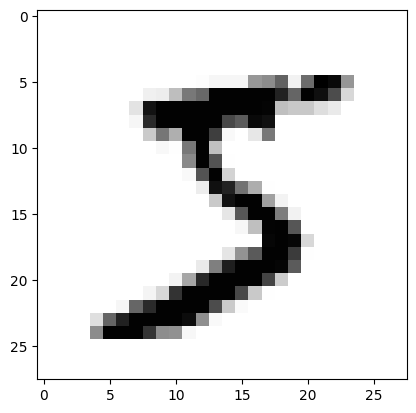

In [26]:
plt.imshow(single_image,cmap="Greys")

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
from tensorflow.keras.utils import to_categorical  

In [28]:
 y_train.shape

(60000,)

In [29]:
y_example = to_categorical(y_train)

In [30]:
y_example.shape

(60000, 10)

In [33]:
y_cat_test=to_categorical(y_test , num_classes=10)

In [32]:
y_cat_test.shape

(10000, 10)

In [34]:
y_cat_train = to_categorical(y_train,10)

In [35]:
single_image.max()

255

In [36]:
single_image.min()

0

In [37]:
x_train=x_train/255
x_test= x_test/255

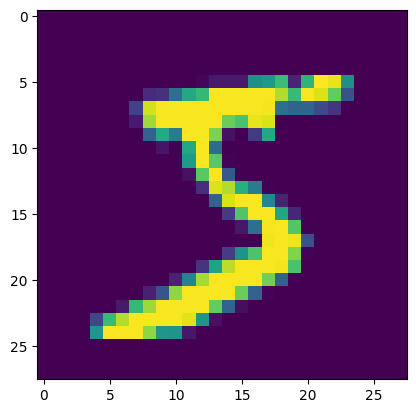

In [43]:
x_train[0].max()


plt.imshow(x_train[0])

In [46]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [47]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [48]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [54]:
model.add(Conv2D(filters=32 ,kernel_size=(4,4),input_shape=(28,28,1),activation="relu" ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))

# output softmax because multiclass classification
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

c:\Users\dilaw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
help(Conv2D)

Help on class Conv2D in module keras.src.layers.convolutional.conv2d:

class Conv2D(keras.src.layers.convolutional.base_conv.BaseConv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |
 |  2D convolution layer.
 |
 |  This layer creates a convolution kernel that is convolved with the layer
 |  input over a single spatial (or temporal) dimension to produce a tensor of
 |  outputs. If `use_bias` is True, a bias vector is created and added to the
 |  outputs. Finally, if `activation` is not `None`, it is applied to the
 |  outputs as well.
 |
 |  Args:
 |      filters: int, the dimension of the output space (the number of filters
 |          in the convolution).
 |      kernel_size: int or tuple/lis

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor="val_loss",patience=1)

In [55]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9163 - loss: 0.2871 - val_accuracy: 0.9785 - val_loss: 0.0626
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9855 - loss: 0.0487 - val_accuracy: 0.9852 - val_loss: 0.0444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9860 - val_loss: 0.0403
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9873 - val_loss: 0.0391
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9953 - loss: 0.0131 - val_accuracy: 0.9856 - val_loss: 0.0491


In [56]:
metrics=pd.DataFrame(model.history.history)

In [57]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.958717,0.140620,0.9785,0.062641
1,0.985267,0.047338,0.9852,0.044373
2,0.990000,0.031362,0.9860,0.040343
3,0.993533,0.020121,0.9873,0.039142
4,0.994750,0.015036,0.9856,0.049059


<Axes: >

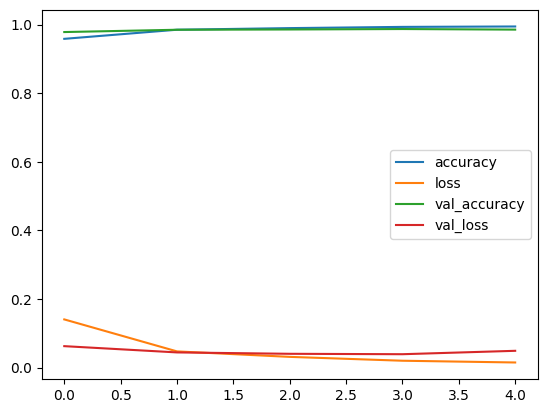

In [58]:
 metrics.plot()

<Axes: >

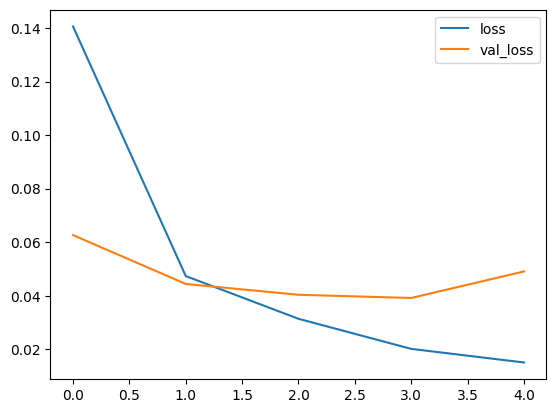

In [59]:
metrics[["loss","val_loss"]].plot()

<Axes: >

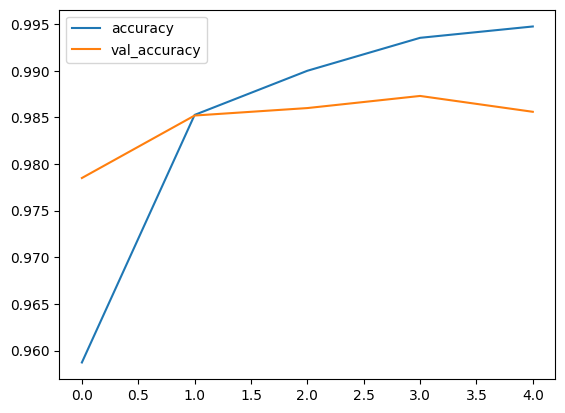

In [60]:
metrics[["accuracy","val_accuracy"]].plot()

In [61]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04905937612056732, 0.9855999946594238]

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
y_cat_test.shape

(10000, 10)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.argmax(model.predict(x_test), axis=-1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9856

In [66]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
confusion_matrix(y_test,classes_x)

array([[ 977,    0,    0,    1,    0,    0,    2,    0,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   1,    4, 1021,    0,    1,    0,    1,    4,    0,    0],
       [   0,    0,    5,  982,    0,   16,    0,    3,    3,    1],
       [   0,    0,    0,    0,  979,    0,    1,    0,    0,    2],
       [   1,    0,    0,    1,    0,  889,    1,    0,    0,    0],
       [   4,    3,    0,    0,    5,    4,  939,    0,    3,    0],
       [   1,    2,   10,    0,    0,    0,    0, 1013,    1,    1],
       [   4,    0,    3,    0,    0,    4,    4,    2,  956,    1],
       [   6,    2,    0,    4,   12,   10,    0,    8,    1,  966]],
      dtype=int64)

In [69]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.97      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.96      1.00      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [70]:
import seaborn as sns


<Axes: >

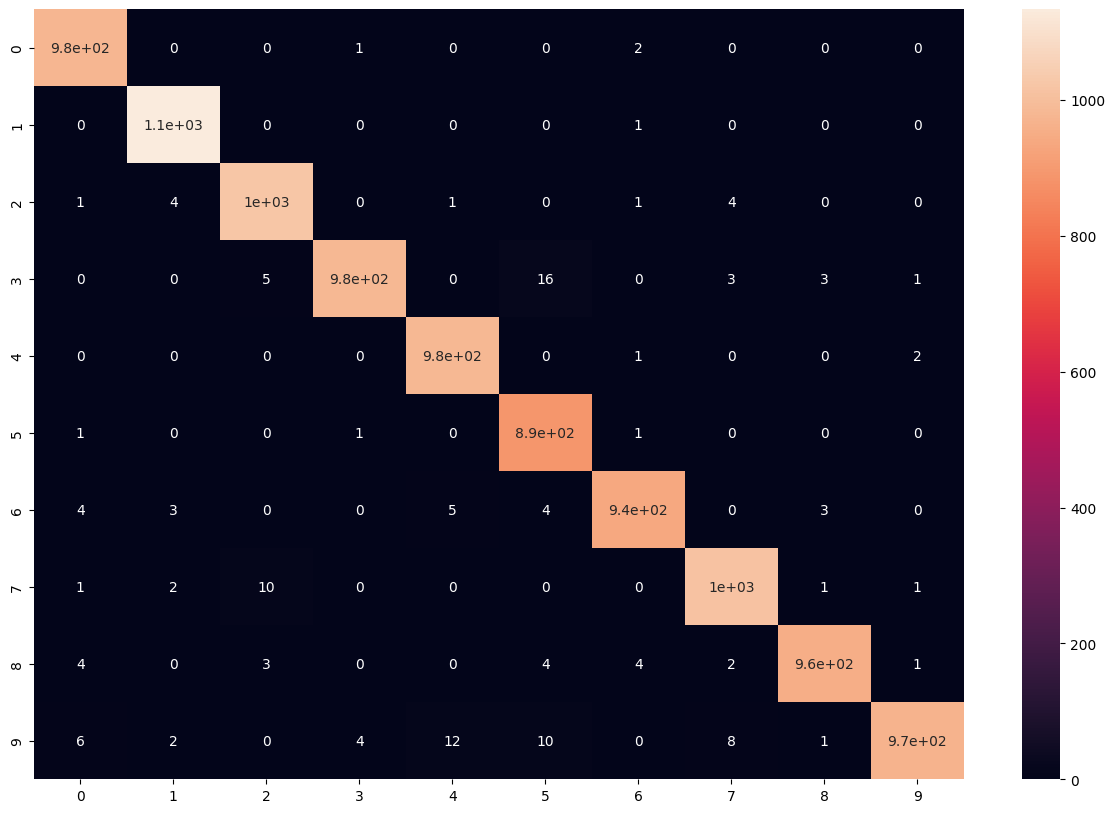

In [73]:
plt.figure(figsize=(15,10) )
sns.heatmap(confusion_matrix(y_test,classes_x) ,annot=True) 

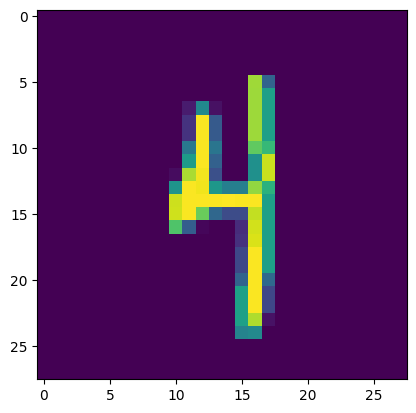

In [81]:
my_number=x_test[65]
my_number.reshape(28,28,1)
plt.imshow(my_number)

In [82]:
predict_x=model.predict(my_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [83]:
classes_x

array([4], dtype=int64)